# Clasificación de Vinos (Wine Dataset)

**Curso:** Machine Learning — Actividad 2 - Modulo 11\
**Autor:** *John Gómez*\
**Fecha:** *2025-10-01*

* * *

## Propósito del cuaderno
Este notebook implementa un flujo completo de clasificación supervisada sobre el dataset **Wine** (scikit-learn), que incluye:
1.  Importación de librerías.
2.  Carga del Dataset.
3.  Exploración Inicial de Datos (EDA) con estadísticas, verificación de faltantes, visualizaciones y análisis de correlación.
4.  División de Datos en entrenamiento y prueba.
5.  Preprocesamiento de Características (Escalado).
6.  Selección y Entrenamiento de Modelo: Regresión Logística.
7.  Evaluación del Modelo de Regresión Logística.
8.  Análisis de Importancia de Características (Permutación).
9.  Selección y Entrenamiento de Modelo Adicional: SVM.
10. Evaluación del Modelo SVM (por defecto).
11. Comparación de Modelos Inicial.
12. Ajuste de Hiperparámetros: SVM (RandomizedSearchCV).
13. Evaluación del Mejor Modelo SVM.
14. Resumen de Hallazgos y Conclusiones.

In [22]:
from IPython.display import display
# -*- coding: utf-8 -*-

# ==== Configuración para Google Colab (opcional) ====
# Instala librerías si es necesario (usar en Colab)
try:
    import google.colab  # type: ignore
#     %pip install -q scikit-learn matplotlib pandas joblib seaborn
except Exception:
    pass
print("Entorno listo ✅")

# ==== 1. Importación de librerías ====
import os
import json
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scikit-learn imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importación de métricas de evaluación
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)
# Importación para análisis de importancia de características
from sklearn.inspection import permutation_importance

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)
sns.set_palette("husl")

print("✅ Todas las librerías importadas correctamente")

Entorno listo ✅
✅ Todas las librerías importadas correctamente


## 2. Carga del Dataset

Cargamos el dataset de vinos utilizando la función `load_wine` de scikit-learn. Este dataset es para problemas de clasificación.

In [23]:
# Cargar el dataset de vinos desde scikit-learn
wine = load_wine()

# Crear un DataFrame de pandas para las características (data)
# Usamos wine.feature_names para asignar los nombres correctos a las columnas
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Crear una Serie de pandas para la variable objetivo (target)
# Asignamos el nombre 'target' a la Serie
y = pd.Series(wine.target, name='target') # Convertir a Serie para facilitar el manejo

# Mostrar las primeras 5 filas del DataFrame de características (X) para previsualizar los datos
print("Primeras 5 filas del DataFrame de características (X):")
display(X.head())

# Mostrar los nombres de las características disponibles en el dataset
print("\nNombres de las características:")
print(wine.feature_names)

# Mostrar los nombres de las clases objetivo disponibles en el dataset
print("\nNombres de las clases (target):")
print(wine.target_names)

# Mostrar las primeras 5 filas de la Serie target (y) para previsualizar las etiquetas
print("\nPrimeras 5 filas de la Serie target (y):")
display(y.head())

Primeras 5 filas del DataFrame de características (X):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Nombres de las características:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Nombres de las clases (target):
['class_0' 'class_1' 'class_2']

Primeras 5 filas de la Serie target (y):


,target
0,0
1,0
2,0
3,0
4,0


## 3. Exploración Inicial de Datos (EDA)

Comencemos con una exploración inicial del DataFrame de características (`X`) para entender su estructura, tipos de datos y la presencia de valores no nulos.

In [24]:
print("Información general del DataFrame X:")
X.info()

Información general del DataFrame X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                    

## 4. División de Datos

Dividimos el dataset en conjuntos de entrenamiento y prueba para preparar los datos para el modelado. Usaremos una división estratificada para mantener la proporción de las clases en ambos conjuntos.

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# stratify=y asegura que la proporción de clases en y se mantenga en los splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train): (133, 13)
Dimensiones del conjunto de prueba (X_test): (45, 13)
Dimensiones del conjunto de entrenamiento (y_train): (133,)
Dimensiones del conjunto de prueba (y_test): (45,)


## Análisis de Correlación

Calculamos y visualizamos la matriz de correlación de Pearson para identificar las relaciones lineales entre las características numéricas.

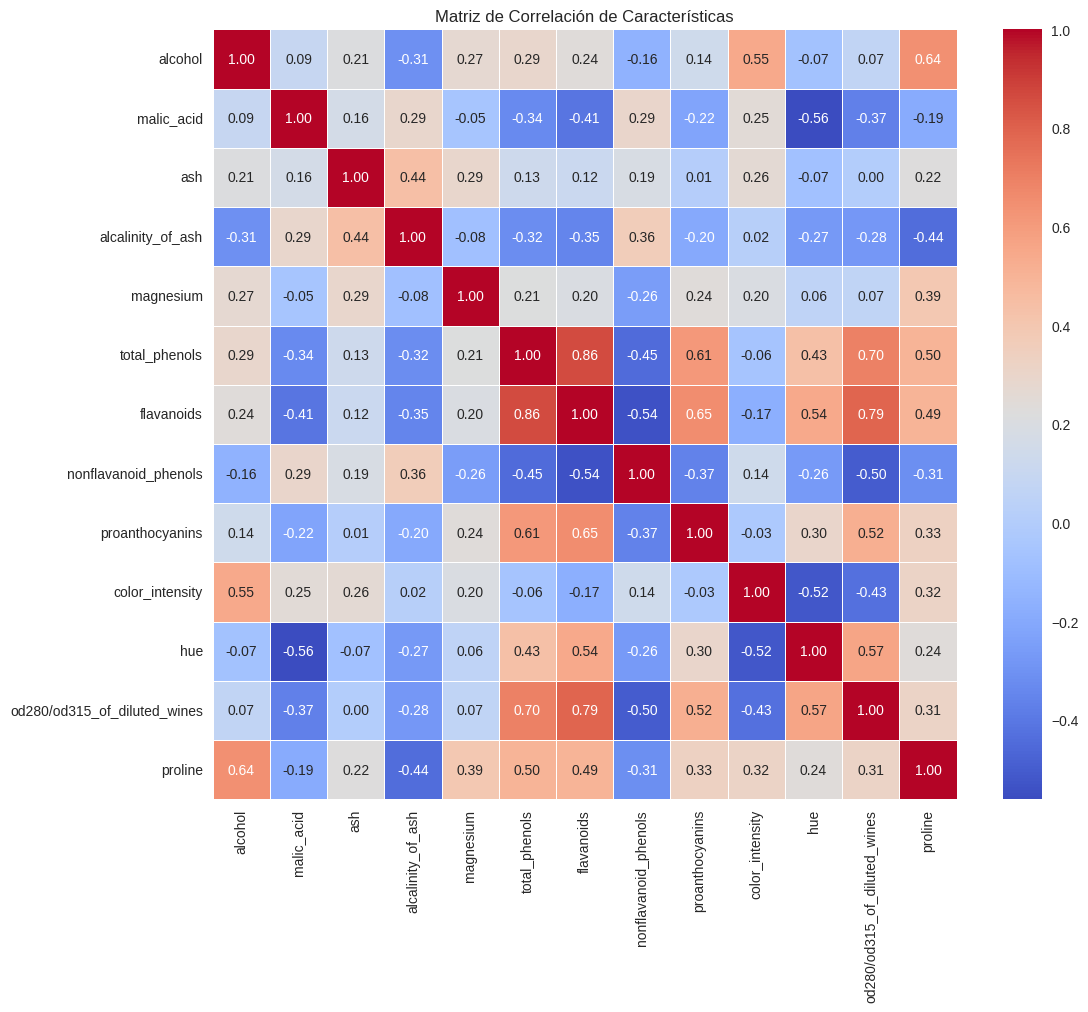

In [26]:
# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Características')
plt.show()

## Visualización de la Distribución de Características

Visualicemos la distribución de cada característica numérica utilizando histogramas y box plots para identificar la forma de la distribución, simetría y la presencia de posibles *outliers*.

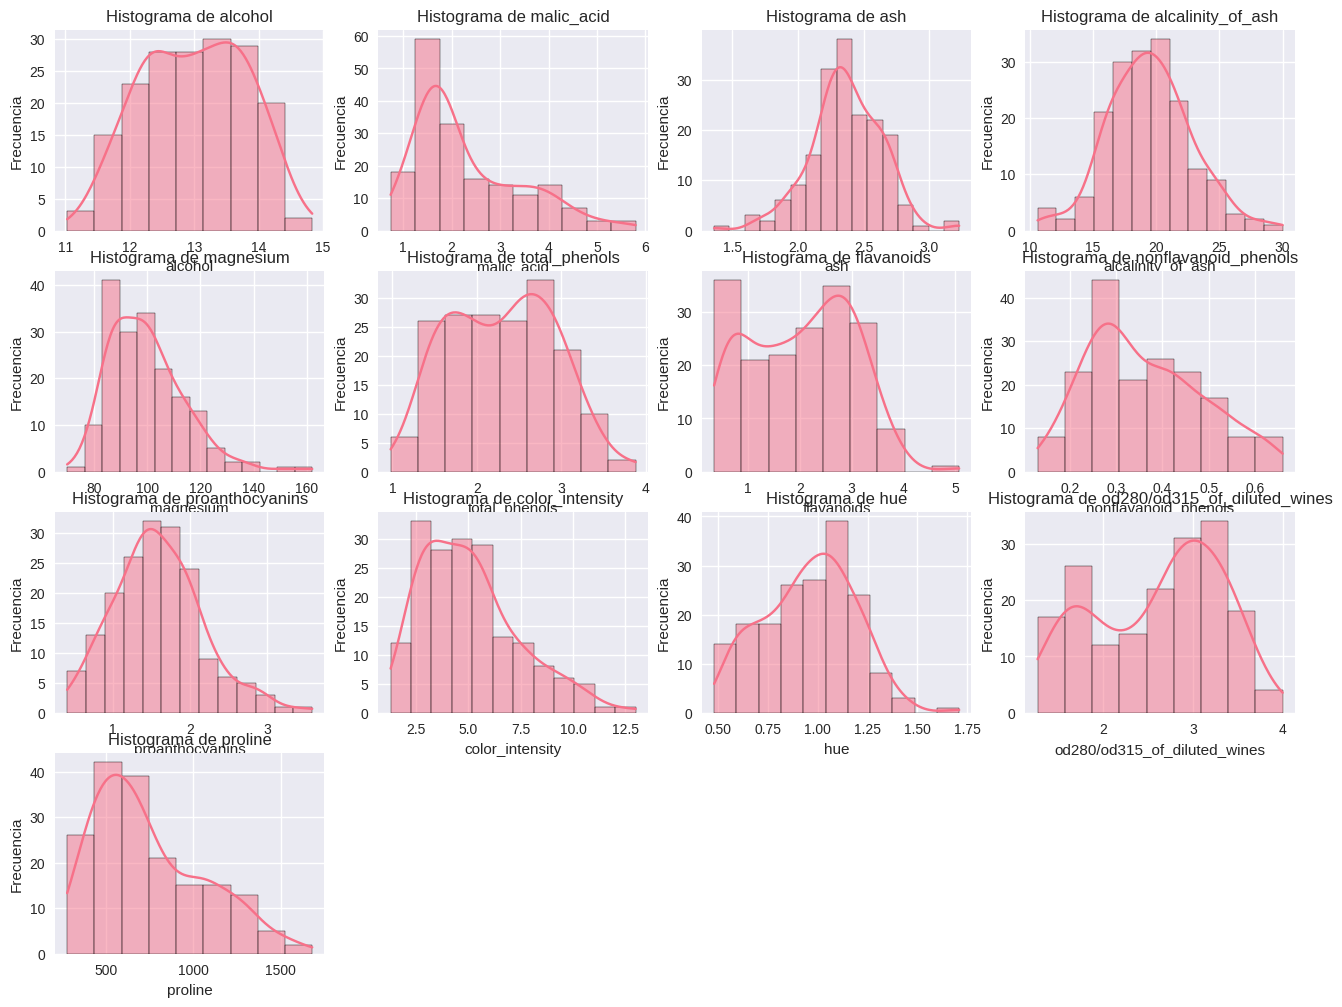

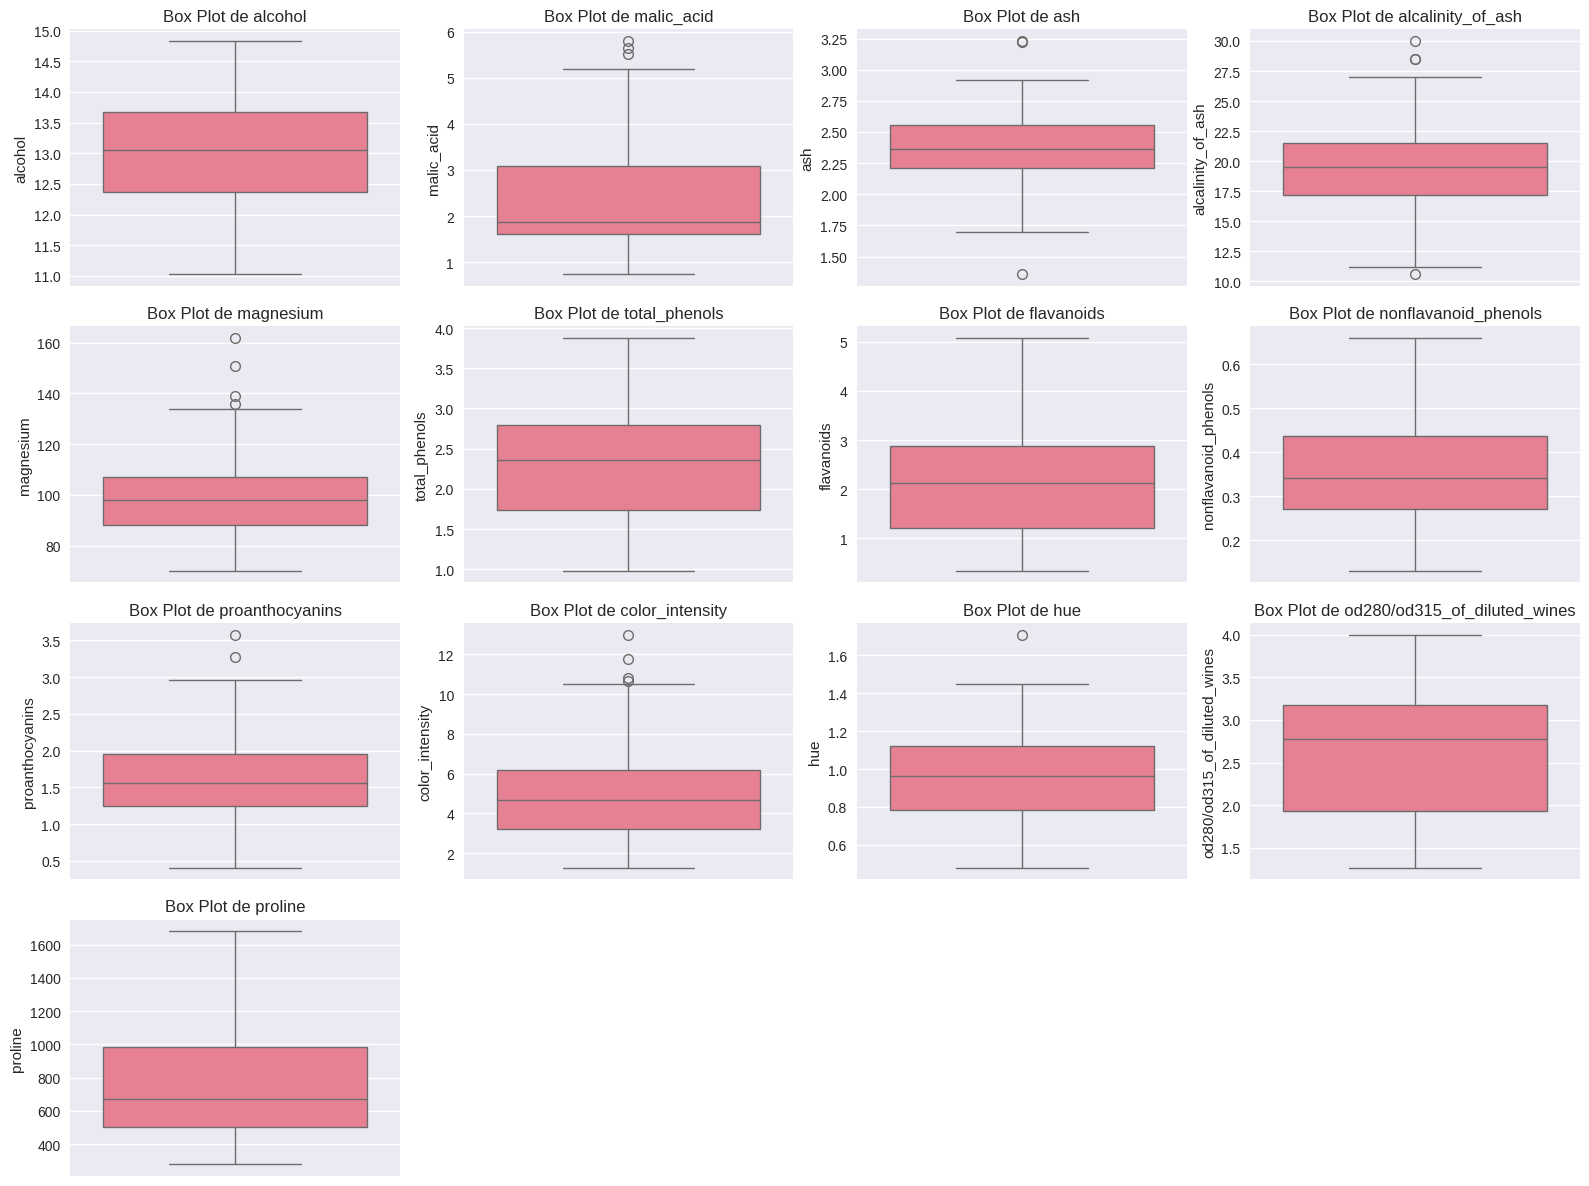

In [27]:
# Visualizar la distribución de las características (Histogramas y Box Plots)

# Número de características
n_features = X.shape[1]
# Calcular el número de filas y columnas para los subplots
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

# Crear figuras para histogramas y box plots
fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
fig_box, axes_box = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

# Aplanar los arrays de ejes para facilitar la iteración
axes_hist = axes_hist.flatten()
axes_box = axes_box.flatten()

# Iterar sobre cada columna del DataFrame X y crear los gráficos
for i, col in enumerate(X.columns):
    # Histograma
    sns.histplot(data=X, x=col, kde=True, ax=axes_hist[i])
    axes_hist[i].set_title(f'Histograma de {col}')
    axes_hist[i].set_xlabel(col)
    axes_hist[i].set_ylabel('Frecuencia')

    # Box Plot
    sns.boxplot(data=X, y=col, ax=axes_box[i])
    axes_box[i].set_title(f'Box Plot de {col}')
    axes_box[i].set_ylabel(col)

# Ocultar ejes vacíos si hay más ejes que características
for j in range(i + 1, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])
    fig_box.delaxes(axes_box[j])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Verificación de Valores Faltantes

Es importante verificar si hay valores nulos en el dataset antes de proceder con el análisis y modelado.

In [28]:
print("Cantidad de valores faltantes por columna en el DataFrame X:")
display(X.isnull().sum())

Cantidad de valores faltantes por columna en el DataFrame X:


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


## Estadísticas Descriptivas

Obtengamos las estadísticas descriptivas de las características numéricas para entender la distribución de los datos.

In [29]:
print("Estadísticas descriptivas del DataFrame X:")
display(X.describe())

Estadísticas descriptivas del DataFrame X:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 5. Preprocesamiento de Características

Aplicamos escalado estándar a las características para que tengan una media de 0 y una desviación estándar de 1. Es importante ajustar el escalador solo con los datos de entrenamiento para evitar la fuga de información del conjunto de prueba.

In [30]:
# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO en los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame (opcional, pero útil para mantener los nombres de las columnas)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Mostrar las primeras filas de los datos escalados (entrenamiento)
print("Primeras 5 filas del conjunto de entrenamiento escalado:")
display(X_train_scaled_df.head())

# Mostrar las estadísticas descriptivas de los datos escalados (entrenamiento) para verificar
print("\nEstadísticas descriptivas del conjunto de entrenamiento escalado:")
display(X_train_scaled_df.describe().T)

Primeras 5 filas del conjunto de entrenamiento escalado:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.330418,-0.637963,-0.744271,-1.700059,-0.200993,0.824559,1.033603,-0.604880,0.643169,0.081545,0.578875,0.373857,0.979713
1,-0.573640,-0.555102,-1.459394,0.238093,-1.004966,-0.131417,-0.076878,-0.350830,-0.213445,-0.877403,0.401109,1.428364,-0.248245
2,0.390207,-0.637963,1.777478,-1.252793,0.669977,0.505900,0.719316,-0.181464,-0.419032,-0.173043,0.623317,0.271335,0.436514
3,-0.798955,-1.236399,-1.572309,-1.461517,2.411918,-0.609404,-0.150212,-0.096781,1.979486,-0.682219,0.489992,-0.417024,0.008540
4,0.239997,0.024920,1.137631,-0.328443,0.066998,0.824559,1.305985,-0.520197,2.065147,0.285215,0.356668,0.842526,1.440608



Estadísticas descriptivas del conjunto de entrenamiento escalado:


,count,mean,std,min,25%,50%,75%,max
alcohol,133.0,5.041915e-15,1.003781,-2.426228,-0.748885,0.027200,0.740697,2.330418
malic_acid,133.0,1.068485e-16,1.003781,-1.466567,-0.665583,-0.481449,0.724630,3.192029
ash,133.0,1.394874e-15,1.003781,-3.792954,-0.631357,-0.029148,0.723613,3.207724
alcalinity_of_ash,133.0,1.455811e-15,1.003781,-2.713862,-0.745892,0.089005,0.536271,3.070778
magnesium,133.0,1.335607e-17,1.003781,-2.009931,-0.803973,-0.133995,0.535982,4.153858
total_phenols,133.0,1.081841e-15,1.003781,-2.075233,-0.928063,0.187242,0.824559,2.545315
flavanoids,133.0,-5.075305e-16,1.003781,-1.732124,-0.810215,0.153599,0.824078,1.829797
nonflavanoid_phenols,133.0,-1.898231e-15,1.003781,-1.959812,-0.774247,-0.181464,0.580685,2.274349
proanthocyanins,133.0,5.275646e-16,1.003781,-2.029465,-0.607487,-0.059254,0.591772,3.384332
color_intensity,133.0,-2.070190e-16,1.003781,-1.581762,-0.830728,-0.139098,0.527073,3.391186


## 6. Selección y Entrenamiento del Modelo

Comenzaremos entrenando un modelo de Regresión Logística, que es un algoritmo simple pero efectivo para problemas de clasificación binaria y multiclase.

In [31]:
# Inicializar el modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento escalados
print("Entrenando el modelo de Regresión Logística...")
logistic_model.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado! ✅")

Entrenando el modelo de Regresión Logística...
¡Entrenamiento completado! ✅


## 7. Evaluación del Modelo

Evaluamos el rendimiento del modelo de Regresión Logística entrenado utilizando el conjunto de prueba y métricas de clasificación relevantes.

Precisión del modelo de Regresión Logística en el conjunto de prueba: 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Matriz de Confusión:


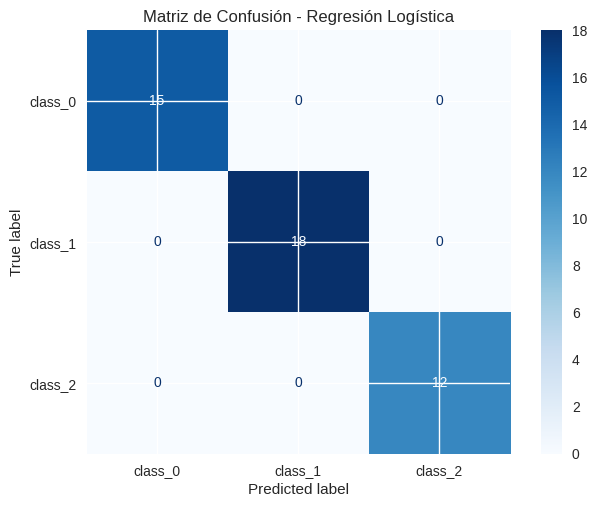


ROC-AUC del modelo de Regresión Logística en el conjunto de prueba (OvR): 1.0000


In [32]:
# Hacer predicciones en el conjunto de prueba escalado
y_pred = logistic_model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Regresión Logística en el conjunto de prueba: {accuracy:.4f}")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Calcular y mostrar el ROC-AUC (para problemas multiclase se usa 'ovo' u 'ovr')
# Asegurarse de que las predicciones de probabilidad estén disponibles
try:
    y_score = logistic_model.predict_proba(X_test_scaled)
    # Calcular AUC para cada clase y promediar (usando 'ovr' es común para multiclase)
    roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
    print(f"\nROC-AUC del modelo de Regresión Logística en el conjunto de prueba (OvR): {roc_auc:.4f}")

    # Visualizar la curva ROC (opcional, puede ser más complejo para multiclase)
    # Se podría hacer para cada clase si es necesario, pero para un resumen usamos AUC.
    # print("\nCurva ROC (OvR):")
    # fig, ax = plt.subplots(figsize=(8, 6))
    # for i in range(len(wine.target_names)):
    #     RocCurveDisplay.from_predictions(y_test == i, y_score[:, i], name=f'Clase {wine.target_names[i]} vs Resto', ax=ax)
    # plt.title('Curva ROC - Regresión Logística (OvR)')
    # plt.show()

except AttributeError:
    print("\nEl modelo de Regresión Logística no soporta predict_proba. No se puede calcular ROC-AUC.")

## 8. Análisis de Importancia de Características

Analizamos la importancia de las características para el modelo de Regresión Logística utilizando la técnica de Importancia por Permutación. Esto nos ayuda a identificar cuáles características son más influyentes en las predicciones del modelo.

Importancia de Características (por Permutación):
  proline: 0.0711 +/- 0.0239
  flavanoids: 0.0667 +/- 0.0222
  hue: 0.0644 +/- 0.0210
  alcohol: 0.0556 +/- 0.0285
  alcalinity_of_ash: 0.0533 +/- 0.0227
  ash: 0.0533 +/- 0.0227
  od280/od315_of_diluted_wines: 0.0489 +/- 0.0133
  color_intensity: 0.0422 +/- 0.0210
  proanthocyanins: 0.0422 +/- 0.0120
  total_phenols: 0.0267 +/- 0.0133
  malic_acid: 0.0178 +/- 0.0133
  nonflavanoid_phenols: 0.0022 +/- 0.0067


/tmp/ipython-input-2302932884.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T,


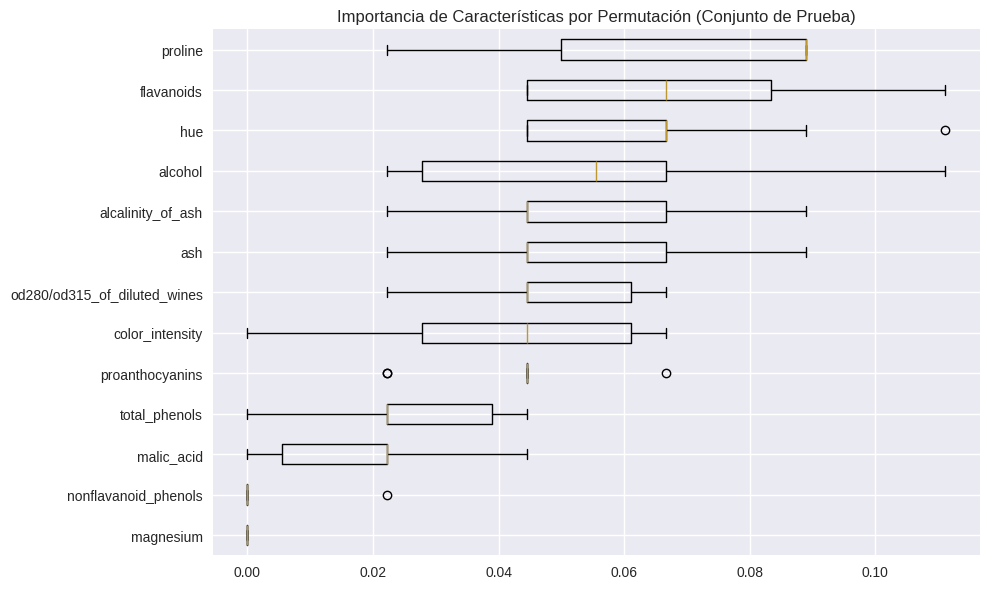

In [33]:
# Calcular la importancia por permutación
# Usamos el conjunto de prueba escalado para evaluar la importancia en datos no vistos
result = permutation_importance(
    logistic_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Ordenar las características por importancia media
sorted_idx = result.importances_mean.argsort()

# Mostrar la importancia de las características
print("Importancia de Características (por Permutación):")
for i in sorted_idx[::-1]:
    if result.importances_mean[i] > 0:
        print(f"  {X.columns[i]}: {result.importances_mean[i]:.4f} +/- {result.importances_std[i]:.4f}")

# Visualizar la importancia de las características
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Importancia de Características por Permutación (Conjunto de Prueba)")
fig.tight_layout()
plt.show()

## 9. Selección y Entrenamiento de Modelo Adicional: SVM

Entrenaremos un modelo Support Vector Machine (SVM) para comparar su rendimiento con el de la Regresión Logística. Los SVM son potentes clasificadores que buscan el mejor hiperplano de separación.

In [34]:
from sklearn.svm import SVC

# Inicializar el modelo SVM (usamos probability=True si queremos predict_proba para ROC-AUC, pero puede ser más lento)
# Para empezar, usaremos los parámetros por defecto.
svm_model = SVC(random_state=42, probability=True) # probability=True permite calcular ROC-AUC después

# Entrenar el modelo con los datos de entrenamiento escalados
print("Entrenando el modelo SVM...")
svm_model.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado! ✅")

Entrenando el modelo SVM...
¡Entrenamiento completado! ✅


## 10. Evaluación del Modelo SVM

Evaluamos el rendimiento del modelo SVM entrenado utilizando el conjunto de prueba y métricas de clasificación relevantes para compararlo con otros modelos.

Precisión del modelo SVM en el conjunto de prueba: 0.9778

Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


Matriz de Confusión (SVM):


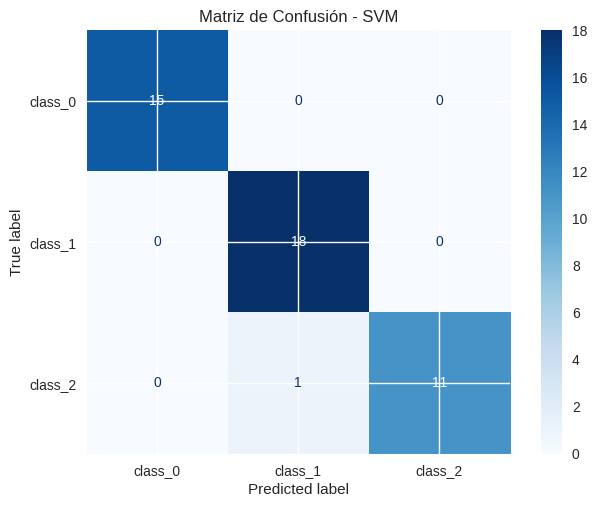


ROC-AUC del modelo SVM en el conjunto de prueba (OvR): 1.0000


In [35]:
# Hacer predicciones en el conjunto de prueba escalado con el modelo SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Calcular la precisión del SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo SVM en el conjunto de prueba: {accuracy_svm:.4f}")

# Mostrar el reporte de clasificación del SVM
print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))

# Mostrar la matriz de confusión del SVM
print("\nMatriz de Confusión (SVM):")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=wine.target_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - SVM')
plt.show()

# Calcular y mostrar el ROC-AUC para el SVM
try:
    y_score_svm = svm_model.predict_proba(X_test_scaled)
    # Calcular AUC para cada clase y promediar (usando 'ovr' es común para multiclase)
    roc_auc_svm = roc_auc_score(y_test, y_score_svm, multi_class='ovr')
    print(f"\nROC-AUC del modelo SVM en el conjunto de prueba (OvR): {roc_auc_svm:.4f}")

    # Visualizar la curva ROC (opcional)
    # print("\nCurva ROC (OvR) - SVM:")
    # fig, ax = plt.subplots(figsize=(8, 6))
    # for i in range(len(wine.target_names)):
    #     RocCurveDisplay.from_predictions(y_test == i, y_score_svm[:, i], name=f'Clase {wine.target_names[i]} vs Resto', ax=ax)
    # plt.title('Curva ROC - SVM (OvR)')
    # plt.show()

except AttributeError:
    print("\nEl modelo SVM no soporta predict_proba (o probability=True no se configuró). No se puede calcular ROC-AUC.")

## 11. Comparación de Modelos

Comparamos el rendimiento del modelo de Regresión Logística, el modelo SVM por defecto y el mejor modelo SVM (después del ajuste de hiperparámetros) en el conjunto de prueba basándonos en las métricas de evaluación calculadas anteriormente.

**Regresión Logística:**
- Precisión: 1.0000
- Reporte de Clasificación: Excelente rendimiento en todas las clases, con precisión, recall y f1-score de 1.00.
- Matriz de Confusión: Predicciones correctas para todas las instancias en el conjunto de prueba.
- ROC-AUC (OvR): 1.0000

**Support Vector Machine (SVM) por Defecto:**
- Precisión: 0.9778
- Reporte de Clasificación: Muy buen rendimiento, con alta precisión, recall y f1-score, aunque con 1 error de clasificación.
- Matriz de Confusión: Muestra un error de clasificación.
- ROC-AUC (OvR): 1.0000

**Mejor Support Vector Machine (SVM) - Ajuste de Hiperparámetros:**
- Precisión: 0.9778
- Reporte de Clasificación: Muy buen rendimiento, similar al SVM por defecto, con 1 error de clasificación.
- Matriz de Confusión: Muestra un error de clasificación idéntico al SVM por defecto.
- ROC-AUC (OvR): 1.0000

**Resumen de la Comparación:**
En este dataset, la **Regresión Logística** logró una precisión perfecta del 100% en el conjunto de prueba. Ambos modelos **SVM (por defecto y el mejor SVM ajustado)** obtuvieron una precisión muy alta del 97.78%, cometiendo un único error de clasificación cada uno. Sorprendentemente, el ajuste de hiperparámetros no mejoró el rendimiento del SVM en el conjunto de prueba en comparación con el modelo por defecto, aunque el score de validación cruzada durante la búsqueda fue ligeramente superior (0.9926).

Todos los modelos lograron un ROC-AUC perfecto de 1.0000, lo que indica una excelente capacidad para distinguir entre las clases, incluso si hay errores de clasificación puntuales (en el caso de los SVM) en el umbral por defecto.

Para este dataset y división específicos, la Regresión Logística fue el modelo con el mejor rendimiento en el conjunto de prueba en términos de precisión. Esto reafirma que el dataset de vinos es linealmente separable en cierta medida, permitiendo que modelos simples como la Regresión Logística obtengan resultados muy altos.

## 12. Ajuste de Hiperparámetros: SVM

Realizamos una búsqueda automatizada de hiperparámetros para el modelo SVM utilizando validación cruzada para encontrar la mejor combinación de parámetros que optimice el rendimiento.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Definir el espacio de búsqueda de hiperparámetros para SVM
# C: Parámetro de regularización. Un C más pequeño crea un margen más amplio.
# gamma: Coeficiente del kernel. Define el alcance de la influencia de una sola instancia de entrenamiento.
# kernel: Especifica el tipo de kernel a usar ('rbf' es común y potente).
param_distributions = {
    'C': loguniform(0.1, 100), # Distribución logarítmica para C
    'gamma': loguniform(0.001, 1), # Distribución logarítmica para gamma
    'kernel': ['rbf', 'linear', 'poly'] # Probar diferentes kernels
}

# Inicializar el modelo SVM
svm = SVC(random_state=42, probability=True) # Mantener probability=True si queremos ROC-AUC

# Inicializar RandomizedSearchCV
# n_iter: Número de combinaciones de parámetros a probar. Aumentar para una búsqueda más exhaustiva.
# cv: Número de folds para la validación cruzada.
# scoring: Métrica a optimizar (por ejemplo, 'accuracy', 'f1_weighted', 'roc_auc_ovr_weighted').
# n_jobs: Número de procesos a usar (-1 usa todos los disponibles).
random_search_svm = RandomizedSearchCV(
    svm,
    param_distributions=param_distributions,
    n_iter=100, # Número de combinaciones a probar
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Validación cruzada estratificada
    scoring='accuracy', # Puedes cambiar a 'f1_weighted' o 'roc_auc_ovr_weighted' si prefieres
    random_state=42,
    n_jobs=-1, # Usa todos los núcleos disponibles
    verbose=1 # Muestra el progreso
)

# Ejecutar la búsqueda en los datos de entrenamiento escalados
print("Realizando búsqueda aleatoria de hiperparámetros para SVM...")
random_search_svm.fit(X_train_scaled, y_train)
print("¡Búsqueda completada! ✅")

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados (SVM):")
print(random_search_svm.best_params_)

# Mostrar el mejor score de validación cruzada
print("\nMejor score de validación cruzada (SVM):")
print(f"{random_search_svm.best_score_:.4f}")

# El mejor modelo entrenado está disponible en random_search_svm.best_estimator_
best_svm_model = random_search_svm.best_estimator_

Realizando búsqueda aleatoria de hiperparámetros para SVM...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
¡Búsqueda completada! ✅

Mejores hiperparámetros encontrados (SVM):
{'C': np.float64(7.119418600172988), 'gamma': np.float64(0.06838478430964044), 'kernel': 'rbf'}

Mejor score de validación cruzada (SVM):
0.9926


## 13. Evaluación del Mejor Modelo SVM

Evaluamos el rendimiento del mejor modelo SVM encontrado a través de la búsqueda de hiperparámetros en el conjunto de prueba para ver su rendimiento final.

Precisión del mejor modelo SVM en el conjunto de prueba: 0.9778

Reporte de Clasificación (Mejor SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


Matriz de Confusión (Mejor SVM):


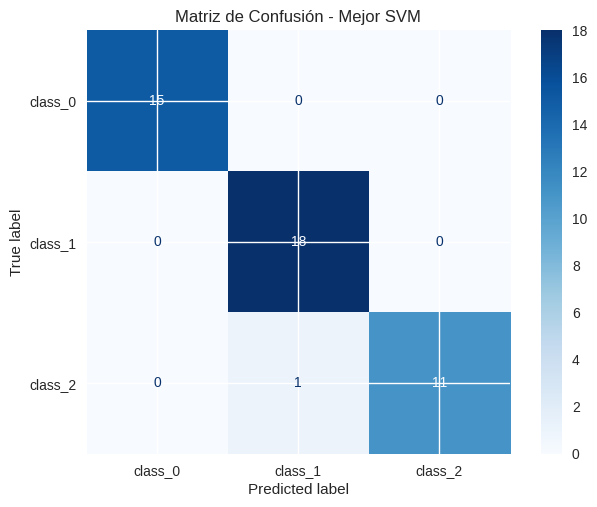


ROC-AUC del mejor modelo SVM en el conjunto de prueba (OvR): 1.0000


In [37]:
# Hacer predicciones en el conjunto de prueba escalado con el mejor modelo SVM
y_pred_best_svm = best_svm_model.predict(X_test_scaled)

# Calcular la precisión del mejor SVM
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Precisión del mejor modelo SVM en el conjunto de prueba: {accuracy_best_svm:.4f}")

# Mostrar el reporte de clasificación del mejor SVM
print("\nReporte de Clasificación (Mejor SVM):")
print(classification_report(y_test, y_pred_best_svm))

# Mostrar la matriz de confusión del mejor SVM
print("\nMatriz de Confusión (Mejor SVM):")
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
disp_best_svm = ConfusionMatrixDisplay(confusion_matrix=cm_best_svm, display_labels=wine.target_names)
disp_best_svm.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Mejor SVM')
plt.show()

# Calcular y mostrar el ROC-AUC para el mejor SVM
try:
    y_score_best_svm = best_svm_model.predict_proba(X_test_scaled)
    # Calcular AUC para cada clase y promediar (usando 'ovr' es común para multiclase)
    roc_auc_best_svm = roc_auc_score(y_test, y_score_best_svm, multi_class='ovr')
    print(f"\nROC-AUC del mejor modelo SVM en el conjunto de prueba (OvR): {roc_auc_best_svm:.4f}")

    # Visualizar la curva ROC (opcional)
    # print("\nCurva ROC (OvR) - Mejor SVM:")
    # fig, ax = plt.subplots(figsize=(8, 6))
    # for i in range(len(wine.target_names)):
    #     RocCurveDisplay.from_predictions(y_test == i, y_score_best_svm[:, i], name=f'Clase {wine.target_names[i]} vs Resto', ax=ax)
    # plt.title('Curva ROC - Mejor SVM (OvR)')
    # plt.show()

except AttributeError:
    print("\nEl mejor modelo SVM no soporta predict_proba. No se puede calcular ROC-AUC.")

## 14. Resumen de Hallazgos y Conclusiones

1.   Elemento de lista
2.   Elemento de lista



### EDA Avanzado

- Las visualizaciones (histogramas y box plots) mostraron la distribución de cada característica y la presencia de algunos outliers, notablemente en `malic_acid`, `alcalinity_of_ash`, `magnesium`, `proanthocyanins`, `color_intensity` y `proline`.
- La matriz de correlación reveló relaciones interesantes entre características, como la alta correlación negativa entre `flavanoids` y `od280/od315_of_diluted_wines` con `color_intensity`, y la alta correlación positiva entre `flavanoids` y `total_phenols`. También hay correlaciones notables entre `alcohol` y `proline`, y entre `alcalinity_of_ash` y `nonflavanoid_phenols`. No se encontraron valores faltantes en el dataset.

### Modelado y Evaluación

- **Regresión Logística:** Este modelo lineal logró un rendimiento perfecto (Precisión 1.0000, ROC-AUC 1.0000) en el conjunto de prueba. Esto sugiere que el dataset de vinos es altamente separable linealmente, al menos con esta división de datos.
- **Support Vector Machine (SVM) por Defecto:** El SVM inicial obtuvo una alta precisión (0.9778) y ROC-AUC (1.0000), con un único error de clasificación en el conjunto de prueba.
- **Mejor Support Vector Machine (SVM) - Ajuste de Hiperparámetros:** A pesar de la búsqueda de hiperparámetros, el mejor modelo SVM obtuvo el mismo rendimiento en el conjunto de prueba (Precisión 0.9778, ROC-AUC 1.0000) que el SVM por defecto. El score de validación cruzada durante la búsqueda fue ligeramente superior (0.9926), pero esta mejora no se reflejó en el conjunto de prueba.

En resumen, la Regresión Logística fue el modelo con mejor precisión en este conjunto de prueba específico. La alta separabilidad del dataset permitió que incluso un modelo simple obtuviera resultados perfectos.

### Importancia de Características (Regresión Logística)

- El análisis de importancia por permutación para el modelo de Regresión Logística identificó a `proline`, `flavanoids`, `hue`, `alcohol`, `alcalinity_of_ash`, `ash`, `od280/od315_of_diluted_wines`, `color_intensity`, `proanthocyanins`, `total_phenols`, `malic_acid` y `nonflavanoid_phenols` como características importantes, listadas en orden descendente de importancia. Esto concuerda con las intuiciones del dominio (química del vino).
